In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
#1 Analyzing Air Quality Data
df = pd.read_csv('global_air_quality.csv')
print(df)

     IndicatorCode                                          Indicator  \
0          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
1          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
2          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
3          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
4          SDGPM25  Concentrations of fine particulate matter (PM2.5)   
...            ...                                                ...   
9445       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9446       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9447       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9448       SDGPM25  Concentrations of fine particulate matter (PM2.5)   
9449       SDGPM25  Concentrations of fine particulate matter (PM2.5)   

     ValueType ParentLocationCode         ParentLocation Location type  \
0         text                AFR                

In [148]:
df['PM25_Value'] = df.loc[:, 'FactValueNumeric']
df

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified,PM25_Value
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00,10.01
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00,10.02
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00,10.06
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00,10.08
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00,10.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00,9.92
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00,9.92
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00,9.94
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00,9.95


In [150]:
df[['FactValueNumeric', 'PM25_Value']]

,FactValueNumeric,PM25_Value
0,10.01,10.01
1,10.02,10.02
2,10.06,10.06
3,10.08,10.08
4,10.09,10.09
...,...,...
9445,9.92,9.92
9446,9.92,9.92
9447,9.94,9.94
9448,9.95,9.95


In [152]:
#1.3 Calculate Average PM2.5 Concentration
continent_average = df.groupby('ParentLocation')['PM25_Value'].mean().reset_index()
continent_average.columns = ['ParentLocation', 'Average_PM25']
print(continent_average)

          ParentLocation  Average_PM25
0                 Africa     29.812282
1               Americas     14.645728
2  Eastern Mediterranean     38.403682
3                 Europe     19.244727
4        South-East Asia     32.145796
5        Western Pacific     15.497559


In [155]:
df = df.merge(continent_average, on = 'ParentLocation', how = 'left')
df

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified,PM25_Value,Average_PM25
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00,10.01,29.812282
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00,10.02,14.645728
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00,10.06,19.244727
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00,10.08,14.645728
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00,10.09,14.645728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00,9.92,14.645728
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00,9.92,14.645728
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00,9.94,29.812282
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00,9.95,14.645728


In [157]:
print(df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']])

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value  Average_PM25  
0                    Africa       10.01     29.812282  
1                  Americas       10.02     14.645728  
2                    Europe       10.06     19.244727  
3                  Americas       10.08     14.645728  
4          

In [167]:
#1.4 Analyze the Data
highest_PM25 = continent_average.loc[continent_average['Average_PM25'].idxmax()]
highest_PM25
#This is a little surprising because I expected it to be the Americas due to fossil fuel usage and bad air quality

ParentLocation    Eastern Mediterranean
Average_PM25                  38.403682
Name: 2, dtype: object

In [169]:
#1.5 Save the Processed Data
specific_data = df[['Location', 'ParentLocation', 'PM25_Value', 'Average_PM25']]
specific_data.to_csv('updated_global_air_quality.csv', index = True)

In [181]:
#2 Planets, planets, planets!
df2 = pd.DataFrame(sns.load_dataset('planets'))
df2

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


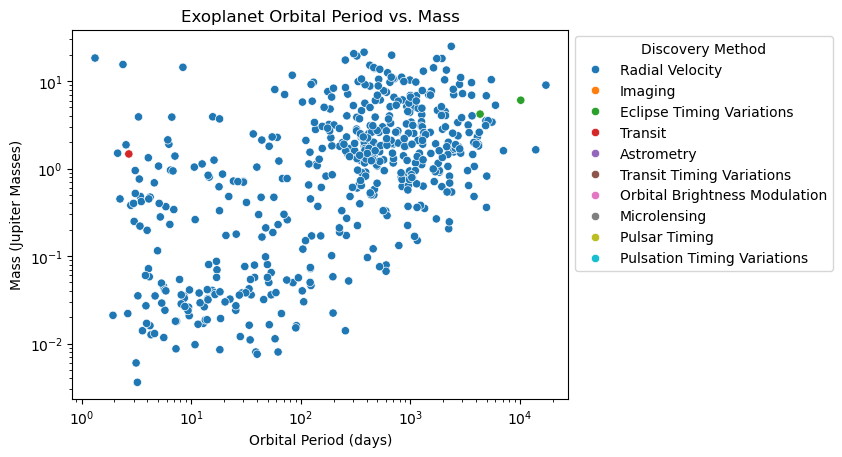

In [217]:
scatter = sns.scatterplot(x = 'orbital_period', y = 'mass', hue = 'method', data = df2[['method','orbital_period', 'mass']])
scatter.set_xlabel('Orbital Period (days)')
scatter.set_ylabel('Mass (Jupiter Masses)')
scatter.set(xscale = 'log', yscale = 'log')
scatter.set_title('Exoplanet Orbital Period vs. Mass')
scatter.legend(title = 'Discovery Method', bbox_to_anchor = (1, 1), loc = 'upper left')

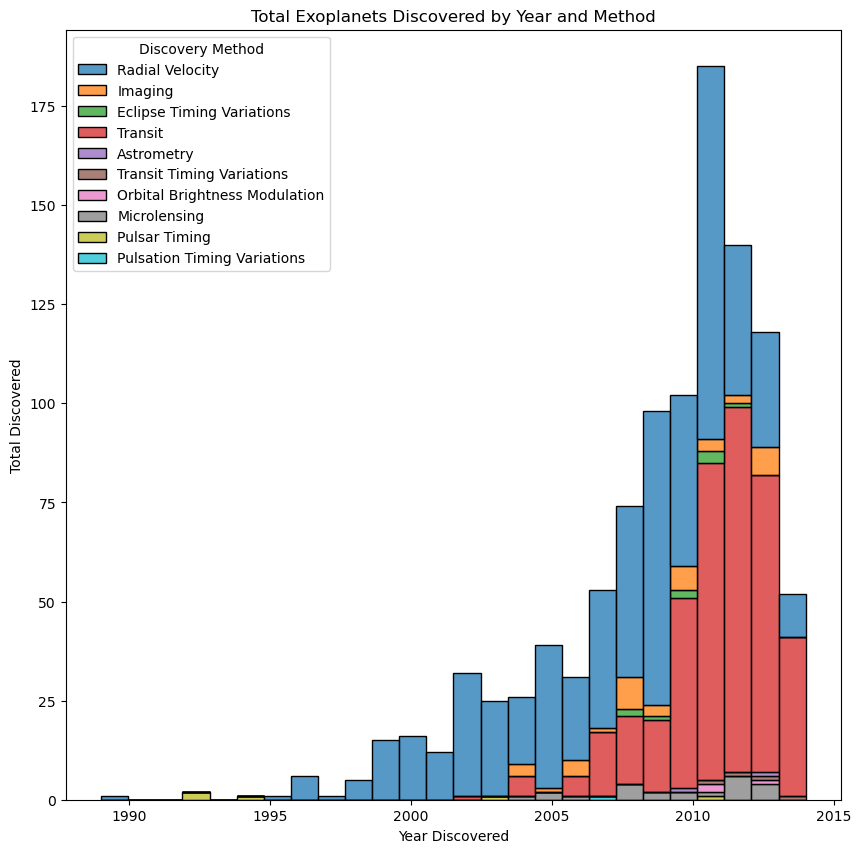

In [241]:
plt.figure(figsize = (10,10))
bar = sns.histplot(x = 'year', hue = 'method', multiple = 'stack', data = df2)
bar.set_title('Total Exoplanets Discovered by Year and Method')
bar.set_xlabel('Year Discovered')
bar.set_ylabel('Total Discovered')
legend = bar.get_legend()
legend.set_title('Discovery Method')